In [77]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
title_font = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 18}
label_font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('log2.csv')
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB
None


In [78]:
print(df.head()) 

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2 

In [79]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57170 entries, 0 to 65530
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           57170 non-null  int64 
 1   Destination Port      57170 non-null  int64 
 2   NAT Source Port       57170 non-null  int64 
 3   NAT Destination Port  57170 non-null  int64 
 4   Action                57170 non-null  object
 5   Bytes                 57170 non-null  int64 
 6   Bytes Sent            57170 non-null  int64 
 7   Bytes Received        57170 non-null  int64 
 8   Packets               57170 non-null  int64 
 9   Elapsed Time (sec)    57170 non-null  int64 
 10  pkts_sent             57170 non-null  int64 
 11  pkts_received         57170 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 5.7+ MB
None


In [80]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,57170.000000,57170.000000,57170.000000,57170.000000,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,50532.499738,8052.147035,22048.739549,3054.123491,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,13880.680957,16513.145167,22141.986286,10363.545911,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49450.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54013.000000,443.000000,16362.500000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58574.000000,445.000000,41883.750000,443.000000,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [81]:
df.isnull().any().any()

False

In [82]:
y = df['Action'].values
y = y.reshape(-1,1)
x_data = df.drop(['Action'],axis = 1)
print(x_data)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65526        51710             43069            65147                 43069   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   

         Bytes  Bytes Sent  Bytes Received  Packets

In [84]:
#NORMALIZATION

from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the data
x_normalized = min_max_scaler.fit_transform(x_data)

# Convert the normalized data back to a DataFrame
x = pd.DataFrame(x_normalized, columns=x_data.columns)

# Check the statistics of the normalized data
pd.Series(x.values.flatten()).describe()


count    628870.000000
mean          0.116792
std           0.273638
min           0.000000
25%           0.000000
50%           0.000003
75%           0.006760
max           1.000000
dtype: float64

In [85]:
x.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055


In [86]:

from sklearn import metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
encoder = OneHotEncoder()

encoded_Y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

encoded_Y


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, encoded_Y, test_size=0.2, random_state=42)

In [89]:
re_transformed_array_trainY = encoder.inverse_transform(y_train)

unique_elements, counts_elements = np.unique(re_transformed_array_trainY, return_counts=True)
unique_elements_and_counts_trainY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_trainY.columns = ['unique_elements', 'count']

unique_elements_and_counts_trainY


,unique_elements,count
0,allow,30009
1,deny,6427
2,drop,9254
3,reset-both,46


In [90]:
re_transformed_array_testY = encoder.inverse_transform(y_test)

unique_elements, counts_elements = np.unique(re_transformed_array_testY, return_counts=True)
unique_elements_and_counts_testY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_testY.columns = ['unique_elements', 'count']

unique_elements_and_counts_testY


,unique_elements,count
0,allow,7430
1,deny,1615
2,drop,2381
3,reset-both,8


In [91]:
list_trainY = unique_elements_and_counts_trainY['unique_elements'].to_list()

list_testY = unique_elements_and_counts_testY['unique_elements'].to_list()

print(list_trainY)

print(list_testY)

['allow', 'deny', 'drop', 'reset-both']
['allow', 'deny', 'drop', 'reset-both']


In [92]:
trainX = X_train
trainY = y_train

testX = X_test
testY = y_test
input_shape = trainX.shape[1]

n_batch_size = 20

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)

n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 100

num_classes = trainY.shape[1]

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()

print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 11
Batch Size: 20

Steps per Epoch: 2286

Test Steps: 571

Number of Epochs: 100

Number of Classes: 4


In [93]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                240       
                                                                 
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 4)                 84        
                                                                 
Total params: 744 (2.91 KB)
Trainable params: 744 (2.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size)

Epoch 1/100
2286/2286 [==============================] - 2s 811us/step - loss: 0.2146 - accuracy: 0.9302
Epoch 2/100
2286/2286 [==============================] - 2s 804us/step - loss: 0.0802 - accuracy: 0.9810
Epoch 3/100
2286/2286 [==============================] - 2s 857us/step - loss: 0.0680 - accuracy: 0.9841
Epoch 4/100
2286/2286 [==============================] - 2s 830us/step - loss: 0.0606 - accuracy: 0.9857
Epoch 5/100
2286/2286 [==============================] - 2s 798us/step - loss: 0.0533 - accuracy: 0.9867
Epoch 6/100
2286/2286 [==============================] - 2s 842us/step - loss: 0.0459 - accuracy: 0.9886
Epoch 7/100
2286/2286 [==============================] - 2s 963us/step - loss: 0.0393 - accuracy: 0.9913
Epoch 8/100
2286/2286 [==============================] - 2s 923us/step - loss: 0.0337 - accuracy: 0.9922
Epoch 9/100
2286/2286 [==============================] - 2s 828us/step - loss: 0.0292 - accuracy: 0.9928
Epoch 10/100
2286/2286 [==============================]

In [96]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_back = encoder.inverse_transform(np.eye(num_classes)[y_pred_classes])


y_test_classes = np.argmax(y_test, axis=1)
y_test_back = encoder.inverse_transform(np.eye(num_classes)[y_test_classes])

# Calculate the metrics
accuracy_dnn_all = accuracy_score(y_test_back, y_pred_back)
precision_dnn_all = precision_score(y_test_back, y_pred_back, average='macro')
recall_dnn_all = recall_score(y_test_back, y_pred_back, average='macro')
f1_dnn_all = f1_score(y_test_back, y_pred_back, average='macro')

# Print the metrics
print("Accuracy:", accuracy_dnn_all)
print("Precision:", precision_dnn_all)
print("Recall:", recall_dnn_all)
print("F1 Score:", f1_dnn_all)


358/358 [==============================] - 0s 412us/step
Accuracy: 0.9979009970264124
Precision: 0.7471717863734754
Recall: 0.7481289767447674
F1 Score: 0.7476496546204987


In [97]:
selected_features = ['Destination Port', 'NAT Source Port', 'Elapsed Time (sec)', 'pkts_received']

# Get the selected features
x_train_selected = X_train[selected_features]
x_test_selected = X_test[selected_features]

trainX = x_train_selected
trainY = y_train

testX = x_test_selected
testY = y_test
input_shape = trainX.shape[1]

n_batch_size = 20

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)

n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 100

num_classes = trainY.shape[1]

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()

print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 4
Batch Size: 20

Steps per Epoch: 2286

Test Steps: 571

Number of Epochs: 100

Number of Classes: 4


In [98]:
print(trainX.describe())

       Destination Port  NAT Source Port  Elapsed Time (sec)  pkts_received
count      45736.000000     45736.000000        45736.000000   45736.000000
mean           0.122953         0.337317            0.006996       0.000215
std            0.252164         0.337892            0.030400       0.007332
min            0.000000         0.000000            0.000000       0.000000
25%            0.000809         0.000000            0.000000       0.000000
50%            0.006760         0.252102            0.002402       0.000003
75%            0.006790         0.639113            0.002864       0.000012
max            0.999527         1.000000            1.000000       1.000000


In [99]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                100       
                                                                 
 dense_19 (Dense)            (None, 20)                420       
                                                                 
 dense_20 (Dense)            (None, 4)                 84        
                                                                 
Total params: 604 (2.36 KB)
Trainable params: 604 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train_selected,
                    y_train,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size)

Epoch 1/100
2286/2286 [==============================] - 1s 513us/step - loss: 0.2301 - accuracy: 0.9354
Epoch 2/100
2286/2286 [==============================] - 1s 496us/step - loss: 0.0986 - accuracy: 0.9752
Epoch 3/100
2286/2286 [==============================] - 1s 567us/step - loss: 0.0796 - accuracy: 0.9775
Epoch 4/100
2286/2286 [==============================] - 1s 583us/step - loss: 0.0595 - accuracy: 0.9818
Epoch 5/100
2286/2286 [==============================] - 1s 557us/step - loss: 0.0443 - accuracy: 0.9885
Epoch 6/100
2286/2286 [==============================] - 2s 720us/step - loss: 0.0358 - accuracy: 0.9936
Epoch 7/100
2286/2286 [==============================] - 1s 648us/step - loss: 0.0307 - accuracy: 0.9946
Epoch 8/100
2286/2286 [==============================] - 1s 580us/step - loss: 0.0270 - accuracy: 0.9953
Epoch 9/100
2286/2286 [==============================] - 1s 570us/step - loss: 0.0244 - accuracy: 0.9960
Epoch 10/100
2286/2286 [==============================]

In [103]:
y_pred_test = model.predict(x_test_selected)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_pred_back_test = encoder.inverse_transform(np.eye(num_classes)[y_pred_classes_test])


y_test_classes = np.argmax(y_test, axis=1)
y_test_back = encoder.inverse_transform(np.eye(num_classes)[y_test_classes])

# Calculate the metrics
accuracy_dnn_sel = accuracy_score(y_test_back, y_pred_back)
precision_dnn_sel = precision_score(y_test_back, y_pred_back, average='macro')
recall_dnn_sel = recall_score(y_test_back, y_pred_back, average='macro')
f1_dnn_sel = f1_score(y_test_back, y_pred_back, average='macro')

# Print the metrics
print("Accuracy:", accuracy_dnn_sel)
print("Precision:", precision_dnn_sel)
print("Recall:", recall_dnn_sel)
print("F1 Score:", f1_dnn_sel)

358/358 [==============================] - 0s 399us/step
Accuracy: 0.9978135385691796
Precision: 0.7470183090283516
Recall: 0.7480953293692627
F1 Score: 0.7475560176212065


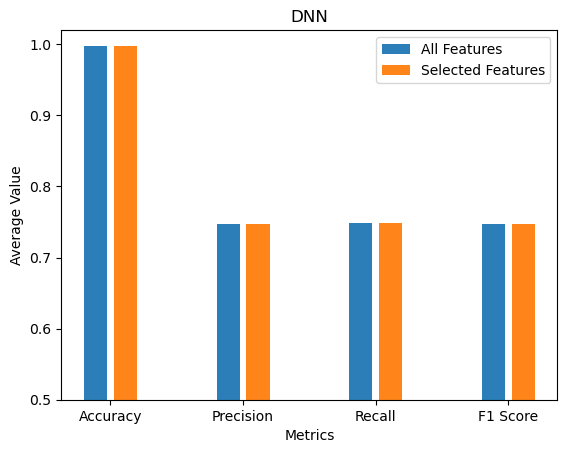

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the average metric values for selected features
selected_metrics = [accuracy_dnn_sel, precision_dnn_sel, recall_dnn_sel, f1_dnn_sel]

# Define the average metric values for all features
all_metrics = [accuracy_dnn_all, precision_dnn_all, recall_dnn_all, f1_dnn_all]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis with increased gaps
r1 = np.arange(len(metric_names)) * 2
r2 = [x + bar_width + 0.1 for x in r1]

# Calculate the center position for metric names
metric_names_center = [(r1[i] + r2[i]) / 2 for i in range(len(r1))]

# Create the bar plot with reversed order and modified colors
plt.bar(r1, all_metrics, width=bar_width,alpha=0.95, label='All Features')
plt.bar(r2, selected_metrics, width=bar_width, alpha=0.95,label='Selected Features')

# Add labels, title, and x-axis tick labels
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('DNN')
plt.xticks(metric_names_center, metric_names)

# Set the y-axis range
plt.ylim(0.5, 1.02)

# Add a legend
plt.legend()

# Show the plot
plt.show()
